# Importing the Data
### by: TM

In [151]:
# Installing packages
!pip install ibllib
!pip install torch

In [152]:
# @title Import the packages
import numpy as np
import matplotlib.pyplot as plt
from oneibl.onelight import ONE
import os
import torch

one = ONE()

In [153]:
# @title Set some global variables
figsize = [12,12]
dpi = 400

In [154]:
# @title Setting up helper functions
def load_data(sn):
    """ loads the data to RAM.
    Args
        - inputs:
            sn: (np.1darray) the number of the desired session
        - outputs:
            spikes: (dict) dictionary including spike data
            wheelmoves: (dict) dictionary including wheel movement data
    """
    session = sessions[sn];
    spikes = one.load_object(session, 'spikes');
    wheelmoves = one.load_object(session, 'wheelMoves');
    return spikes, wheelmoves
    
def plot_session_raster(sn):
    """ plots the raster for the spikes on the specified session number (sn) from the ONE data.
        Args:
        - inputs:
            sn: (np.1darray) the number of the desired session
        - outputs:
            1. matplotlib figure
            2. also saves it to the $pwd as "%$sn.png".
    """
    spikeraster = plt.figure(figsize=figsize, dpi=dpi);
    spikeraster = plt.axis("off");
    spikeraster = plt.plot(sp, cl, ',');
    spikeraster = plt.vlines(wheelmoves['intervals'], 0, max(spikes['clusters']), 'r', lw=0.1)
    plt.savefig("%s.png" % sn, dpi=dpi)
    
def plot_trial_raster(tn):
    """ plots the raster for the spikes on the specified trial number (tn) from the ONE data.
        Args:
        - inputs:
            tn: (np.1darray) the number of the desired trial
        - outputs:
            matplotlib.plt figure
    """
    spikeraster = plt.figure(figsize=[4,4], dpi=dpi/6);
    spikeraster = plt.axis("off");
    spikeraster = plt.plot((trials[tn])[0],(trials[tn])[1], ',');

In [155]:
# # @title **[do not run]** Download the files from source (No need to run. The files are already stored in the GDrive, and are also availble through ONE)
# # Run this field if you do not have the necessary files on GDrive. This will take approx 15 GB of space ~35-40 min of time!


# !unzip "!wget https://ndownloader.figshare.com/articles/9974357/versions/2"
# %cp /content/nicklab* '/content/gdrive/My Drive/Project/Datasets/Steinemtz/Train' -rv

----
### Import data from FigShare to `ONE`
Run this field if you prefer to work from the online data. The API will only download the files you specify with `load_object`.

In [156]:
# # Import from this link:

one.set_figshare_url("https://figshare.com/articles/steinmetz/9974357");
sessions = one.search(['spikes'])
sessions

['nicklab/Subjects/Cori/2016-12-14/001',
 'nicklab/Subjects/Cori/2016-12-17/001',
 'nicklab/Subjects/Cori/2016-12-18/001',
 'nicklab/Subjects/Forssmann/2017-11-01/001',
 'nicklab/Subjects/Forssmann/2017-11-02/001',
 'nicklab/Subjects/Forssmann/2017-11-04/001',
 'nicklab/Subjects/Forssmann/2017-11-05/001',
 'nicklab/Subjects/Hench/2017-06-15/001',
 'nicklab/Subjects/Hench/2017-06-16/001',
 'nicklab/Subjects/Hench/2017-06-17/001',
 'nicklab/Subjects/Hench/2017-06-18/001',
 'nicklab/Subjects/Lederberg/2017-12-05/001',
 'nicklab/Subjects/Lederberg/2017-12-06/001',
 'nicklab/Subjects/Lederberg/2017-12-07/001',
 'nicklab/Subjects/Lederberg/2017-12-08/001',
 'nicklab/Subjects/Lederberg/2017-12-09/001',
 'nicklab/Subjects/Lederberg/2017-12-10/001',
 'nicklab/Subjects/Lederberg/2017-12-11/001',
 'nicklab/Subjects/Moniz/2017-05-15/001',
 'nicklab/Subjects/Moniz/2017-05-16/001',
 'nicklab/Subjects/Moniz/2017-05-18/001',
 'nicklab/Subjects/Muller/2017-01-07/001',
 'nicklab/Subjects/Muller/2017-01-

## The list of the sessions:
- The first 5 (0 through 4) are the test set
- The second 5 (5 through 9) are the validation set
- The other 29 (10 through 38) are the training set

## Import to RAM:
The choice `sn` sets the session number from the list above.

We will use the helper functions `load_data` and `plot_raster` to repsectively import the data from ONE API and to plot the raster plot based on the times and clusters of neurons. ONE API uses `memmaps`, which means the matrices stay in the long-term storage and only a soft link is stored in storage, until immutations are done.


In [157]:
# sn = 16

# spikes, wheelmoves = load_data(sn)

# sp = spikes['times'][:,0]  # spike times
# cl = spikes['clusters'][:,0]   # spike clusters
# am = spikes['amps'][:,0]
# ints = wheelmoves['intervals']  # intervals of moving the wheel [in seconds]

# # Extracting metadata:
# srate = len(spikes['times'])/spikes['times'][-1]
# dt = 1/srate


# intpts = ints * srate  # intervals of moving the wheel [datapoints]
# intpts = np.round(intpts).astype(int)
# moves = wheelmoves['intervals'][:,1]-wheelmoves['intervals'][:,0]  # length of each interval
# wmt = wheelmoves['type']

# # ## Clean up the wheel moves. Some seem to have NaN or abnormal activity recorded,
# # ## we will discard those as immobile. Immutes the dict:

# for i in range(len(wmt)):
#     if wmt[i][0]==3:
#         wmt[i][0] = 0

# print('Sampling rate of this set is approximately %s Hz' % round(srate[0],2))

This will yield two dictionaries:
#### **1.** `spikes`
- `amps`: **amplitudes of the spikes**
- `clusters`:  **spatial index (location)** 
- `depths`: **diff between the amplitudes of the spike and the directly previous spike"
- `times`: **temporal index**

We will mainly use the `clusters` and the `times` of the spikes.

#### **2.** `wheels`
with the keys:
- `position`
- `timestamps`

In [158]:
# # Raster plot of all spikes based on `sp` and `cl` in the whole session

# plot_session_raster(sn)

## Extracting the events from the dataset

The extracted data are:
- `trials[i][0]`: spike timing
- `trials[i][1]`: spike location (cluster)
- `trials[i][2]`: spike amplitude
- `wmt[i]`: wheel movement type. `0`=flinch or motionless `1`=clockwise, `2`=counterclockwise

In [159]:
# train_data = []
# single_vector_wmt = np.squeeze(wmt)
# for i in range(len(trials)):
#     train_data.append([np.expand_dims(matrix_of_trials[i], axis=0).astype(float), single_vector_wmt[i]])

In [160]:
# trainloader = torch.utils.data.DataLoader(train_data[:500], shuffle=True, batch_size=32)
# i1, l1 = next(iter(trainloader))
# print(i1.shape)

In [161]:
# print(l1.shape)

In [162]:
def get_session_data(sn: int):
    spikes, wheelmoves = load_data(sn)

    sp = spikes['times'][:,0]  # spike times
    cl = spikes['clusters'][:,0]   # spike clusters
    am = spikes['amps'][:,0]
    ints = wheelmoves['intervals']  # intervals of moving the wheel [in seconds]

    # Extracting metadata:
    srate = len(spikes['times'])/spikes['times'][-1]
    dt = 1/srate


    intpts = ints * srate  # intervals of moving the wheel [datapoints]
    intpts = np.round(intpts).astype(int)
    moves = wheelmoves['intervals'][:,1]-wheelmoves['intervals'][:,0]  # length of each interval
    wmt = wheelmoves['type']

    # ## Clean up the wheel moves. Some seem to have NaN or abnormal activity recorded,
    # ## we will discard those as immobile. Immutes the dict:

    for i in range(len(wmt)):
        if wmt[i][0]==3:
            wmt[i][0] = 0
            
    trials = [np.hstack([np.vstack([[sp[intpts[i,0]:intpts[i,1]]],
                                    [cl[intpts[i,0]:intpts[i,1]]],
                                    [am[intpts[i,0]:intpts[i,1]]]])]) for i in range(len(ints))]
    new_min = 0
    new_max = 749
    matrix_of_trials = np.zeros((len(trials), new_max+1, new_max+1))

    for i, trial in enumerate(trials):
        trial = np.array(trial)
        old_min = np.amin(trial[0])
        old_max = np.amax(trial[0])

        old_range = old_max - old_min
        new_range = new_max - new_min

        trial[0] = ((trial[0] - old_min) * new_range / old_range) + new_min
        matrix_of_trials[i, trial[0].astype(int), trial[1].astype(int)] = trial[2]
        
    session_data = []
    single_vector_wmt = np.squeeze(wmt)
    for i in range(len(trials)):
        session_data.append([np.expand_dims(matrix_of_trials[i], axis=0).astype(float), single_vector_wmt[i]])
        
    return session_data

In [163]:
data = get_session_data(sn=16)

print(len(data))

### Full Data Acquisition
from math import ceil

demo_ratio = .05
val_ratio = .15
test_ratio = .15
train_ratio = 1 - (demo_ratio + val_ratio + test_ratio)

last_trial_idx = len(data)
demo_idx = int(last_trial_idx * demo_ratio)
val_idx = demo_idx + int(last_trial_idx * val_ratio)
test_idx = val_idx + int(last_trial_idx * test_ratio)
train_idx = test_idx + int(last_trial_idx * train_ratio)

print("demo: 0-{}; val: {}-{}; test: {}-{}; train: {}-{}".format(
    demo_idx-1,
    demo_idx, val_idx-1,
    val_idx, test_idx-1,
    test_idx, train_idx-1
))

722
demo: 0-35; val: 36-143; test: 144-251; train: 252-720


## Build Baseline Model - CNN


In [164]:
import torch
import numpy as np

import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import transforms

import torch.fft as fft

In [254]:
output_channels_1 = 32
output_channels_2 = 64
output_channels_3 = 128
k = 5

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "CNN"
        self.conv1 = nn.Conv2d(1, output_channels_1, k)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(output_channels_1, output_channels_2, k)
        self.conv3 = nn.Conv2d(output_channels_2, output_channels_3, k)
        self.fc1 = nn.Linear(output_channels_3 * 90 * 90, output_channels_1)
        self.fc2 = nn.Linear(output_channels_1, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        #print(x.shape)
        x = x.view(-1, output_channels_3 * 90 * 90)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        #print(x.shape)
        x = self.fc2(x)
        x = x.squeeze(1)
        return x
    
    print('Neural Network Architecture Selected')

Neural Network Architecture Selected


In [255]:
def get_dataloader(data_set: str, batch_size: int = 64):
    return trainloader

In [256]:
use_cuda =True
def train(model, val_loader, train_loader, learning_rate=0.01, epochs=5, batch_size=64, use_toy_data=False):
    torch.manual_seed(360)

#     if use_toy_data:
#         train_loader = get_dataloader(data_set='toy', batch_size=batch_size)
#         val_loader = get_dataloader(data_set='toy', batch_size=batch_size)
#     else:
#         train_loader = get_dataloader(data_set='train', batch_size=batch_size)
#         val_loader = get_dataloader(data_set='val', batch_size=batch_size)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_acc = np.zeros(epochs)
    train_loss = np.zeros(epochs)
    val_acc = np.zeros(epochs)
    val_loss = np.zeros(epochs)

    n=0
    iters = []
    
    for epoch in range(epochs):
        for images, labels in train_loader:
            if use_cuda and torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()

            out = model(images.float()) # forward pass
            loss = criterion(out, labels.long()) # compute the total loss
            loss.backward() # backward pass (compute parameter updates)
            optimizer.step() # make the updates for each parameter
            optimizer.zero_grad() # a clean up step for PyTorch

        train_acc[epoch], train_loss[epoch] = get_accuracy_and_loss(model, criterion, train_loader)
        val_acc[epoch], val_loss[epoch] = get_accuracy_and_loss(model, criterion, val_loader)
        iters.append(n)
        n += 1

        print("epoch: {} | train acc: {} | train loss: {} | val acc: {} | val loss: {}".format(epoch, train_acc[epoch], train_loss[epoch], val_acc[epoch], val_loss[epoch]))
    
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, train_loss, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()
    
    return train_acc, train_loss, val_acc, val_loss

In [257]:
use_cuda =True
def get_accuracy_and_loss(model, criterion, data_loader) -> tuple:
    total_acc = 0.0
    total_loss = 0.0
    total_epoch = 0
    for i, data in enumerate(data_loader, 0):
        imgs, labels = data
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()

        output = model(imgs.float())
        loss = criterion(output, labels.long())
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct = pred.eq(labels.view_as(pred)).sum().item()

        total_acc += correct
        total_loss += loss.item()
        total_epoch += len(labels)
    
    acc = float(total_acc) / total_epoch
    loss = float(total_loss) / (i + 1)

    return acc, loss

In [258]:
batch_size = 10

val_loader = torch.utils.data.DataLoader(data[501:600], shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(data[601:], shuffle=True, batch_size=batch_size)
train_loader = torch.utils.data.DataLoader(data[0:500], shuffle=True, batch_size=batch_size)

using cuda!
epoch: 0 | train acc: 0.874 | train loss: 0.47890513241291044 | val acc: 0.8282828282828283 | val loss: 0.46535049974918363
epoch: 1 | train acc: 0.998 | train loss: 0.1449756334722042 | val acc: 0.9090909090909091 | val loss: 0.3299142099916935
epoch: 2 | train acc: 1.0 | train loss: 0.03570580537896603 | val acc: 0.8383838383838383 | val loss: 0.44400614881888034
epoch: 3 | train acc: 1.0 | train loss: 0.0071815021336078646 | val acc: 0.8888888888888888 | val loss: 0.45256361074279994
epoch: 4 | train acc: 1.0 | train loss: 0.003381022230751114 | val acc: 0.8888888888888888 | val loss: 0.4715139227337204
epoch: 5 | train acc: 1.0 | train loss: 0.0019683385972166434 | val acc: 0.8787878787878788 | val loss: 0.5234910125844181
epoch: 6 | train acc: 1.0 | train loss: 0.0013371636848023628 | val acc: 0.8888888888888888 | val loss: 0.5265743695694255
epoch: 7 | train acc: 1.0 | train loss: 0.000971804732689634 | val acc: 0.8888888888888888 | val loss: 0.5537795007228852
epoch:

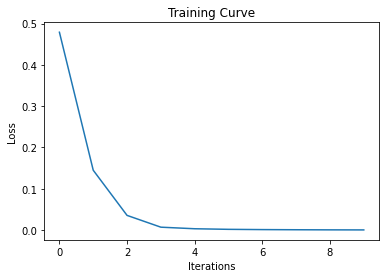

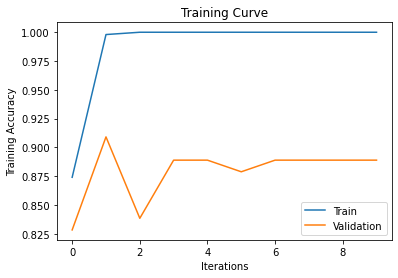

training time: 224.9573061466217


In [259]:
# try training

use_cuda = True
lr = 0.0001
epochs = 10

model = CNN()

if use_cuda and torch.cuda.is_available():
    print("using cuda!")
    model.cuda()

import time

start = time.time()
train_acc = train(model, learning_rate=lr, epochs=epochs, batch_size=batch_size, use_toy_data=True, val_loader=val_loader, train_loader=train_loader)
end = time.time()
print('training time:', end-start)

In [260]:
# test model

acc, loss = get_accuracy_and_loss(model=model, criterion=nn.CrossEntropyLoss(), data_loader=test_loader)
print(acc, loss)

0.9586776859504132 0.1408550126647102


torch.Size([1, 1, 750, 750])
training time: 0.0011920928955078125
torch.Size([1, 1, 750, 750])
float64


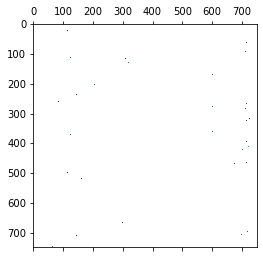

predicted: tensor([[ 9.3698, -5.4246, -1.2612]], device='cuda:0',
       grad_fn=<SqueezeBackward1>)
actual: tensor([0.], dtype=torch.float64)


In [261]:
#sample prediction
sample_loader = torch.utils.data.DataLoader(data[601], shuffle=True, batch_size=1)

image, label = iter(sample_loader)
print(image.shape)
if use_cuda and torch.cuda.is_available():
    image = image.cuda()
    labels = label.cuda()
    model.cuda()
start = time.time()
out = model(image.to("cuda", dtype=torch.float))
end = time.time()
print('training time:', end-start)

#plotting

print(image.shape)
plot_image = torch.squeeze(image).detach().cpu().numpy()
print(plot_image.dtype)
plot_image[plot_image == 0] = np.nan
plt.matshow(plot_image)
plt.show()

print('predicted:', out)
print('actual:', label)


# FCNN

In [174]:
# function to plot 1-dimensional FFT array or tensor
def plot_spectrum(img_fft, tensor_flag = 0):
  #take fft tensor in [x,y,3] shape
  from matplotlib.colors import LogNorm
  if (tensor_flag == 0):
    img_np_fft = img_fft.cpu().numpy()
    # A logarithmic colormap
    plt.imshow(np.abs(img_np_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
  else:
    # A logarithmic colormap
    plt.imshow(np.abs(img_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

In [175]:
#filters
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# ideal filter
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[2:])
    rows, cols = imgShape[2:]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return torch.from_numpy(base)

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[2:])
    rows, cols = imgShape[2:]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return torch.from_numpy(base)

# butterworth filter
def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[2:])
    rows, cols = imgShape[2:]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return torch.from_numpy(base)

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[2:])
    rows, cols = imgShape[2:]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return torch.from_numpy(base)

# Gaussian Filter
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[2:])
    rows, cols = imgShape[2:]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return torch.from_numpy(base)

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[2:])
    rows, cols = imgShape[2:]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return torch.from_numpy(base)

In [176]:
#filter selection
# flag_HL: if it is 0, return low pass filter. If it is 1, return high pass filter
# filter_type: 0 - idea, 1 - butterworth, 2 - Gaussian
# D0: diameter of filter
# imgShape: filter size based on image shape
# n?
def filter_selection(flag_HL, filter_type, D0, imgShape, n):
  if (filter_type == 0 and flag_HL == 0):   return idealFilterLP(D0, imgShape).cuda()
  elif (filter_type == 0 and flag_HL == 1): return idealFilterHP(D0, imgShape).cuda()
  elif (filter_type == 1 and flag_HL == 0): return butterworthLP(D0,imgShape,n).cuda()
  elif (filter_type == 1 and flag_HL == 1): return butterworthHP(D0,imgShape,n).cuda()
  elif (filter_type == 2 and flag_HL == 0): return gaussianLP(D0,imgShape).cuda()
  elif (filter_type == 2 and flag_HL == 1): return gaussianHP(D0,imgShape).cuda()
  else:  return idealFilterHP(D0, imgShape).cuda() # as default 

In [177]:
#FCNN layer
class FConv2d(nn.Module):
    def __init__(self, flag_hl, filter_t, d0, n):
        super(self.__class__, self).__init__()
        self.flag_hl = flag_hl
        self.filter_t = filter_t
        self.d0 = d0
        self.n = n

    def forward(self, x):
        w = filter_selection(self.flag_hl, self.filter_t, self.d0, x.shape, self.n)
        #w = torch.unsqueeze(fft.fftn(w), dim=0)
        w = torch.unsqueeze(w, dim=0)
        w = torch.unsqueeze(w, dim=0)
        x = fft.fftn(x, dim=[2,3])
        y = w * x

        return fft.ifftn(y).real.float()

In [178]:
output_channels_1 = 16
output_channels_2 = 32
output_channels_3 = 64
k = 5
input_size_fc1 = 8649
input_size_fc1_2 = 138384

#Fast Fourier Transform Convolutional Neural Network Architecture
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.fcov1 = FConv2d(0,1,250,20)
        self.fcov2 = FConv2d(0,1,100,10)
        self.fcov3 = FConv2d(0,1,50,2)
        self.conv1 = nn.Conv2d(1, output_channels_1, k)
        self.conv2 = nn.Conv2d(output_channels_1, output_channels_2, k)
        self.conv3 = nn.Conv2d(output_channels_2, output_channels_3, k)
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.fc1 = nn.Linear(input_size_fc1_2, output_channels_1)
        self.fc2 = nn.Linear(output_channels_1, 3)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(self.fcov1(x))))
        x = self.pool(F.relu(self.fcov2(x)))
        x = self.pool(F.relu(self.fcov3(x)))
        x = x.view(-1, input_size_fc1_2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1)
        return x
    
    print('Fast Fourier Transform Convolutional Neural Network Architecture Selected')

Fast Fourier Transform Convolutional Neural Network Architecture Selected


In [179]:
# #test code section by section
# for images, labels in train_loader:
#     print(images.shape)
#     test_W = filter_selection(0,0,50,images.shape,10)
#     un_tw = torch.unsqueeze(test_W, dim=0)
#     un2_tw = torch.unsqueeze(un_tw, dim=0)
#     print(test_W[350][350])
#     plt.figure()
#     plot_spectrum(test_W)
#     print(un_tw)
#     print(un2_tw.shape)
#     ttt  = un2_tw * images
#     print(ttt.shape)
    
#     #for i in range(batch_size):
#     #    ttt  = un2_tw * images
#     #    print(ttt.shape)
#     #c_un2_tw = torch.cat((un2_tw, un2_tw, un2_tw,un2_tw,un2_tw,un2_tw,un2_tw,un2_tw,un2_tw,un2_tw), dim=0)
#     #print(c_un2_tw.shape)
    
#     #tt = images * c_un2_tw
    
#     break;



using cuda!
epoch: 0 | train acc: 0.158 | train loss: 1.154045386314392 | val acc: 0.020202020202020204 | val loss: 1.1948378801345825
epoch: 1 | train acc: 0.158 | train loss: 1.144830801486969 | val acc: 0.020202020202020204 | val loss: 1.1781402707099915


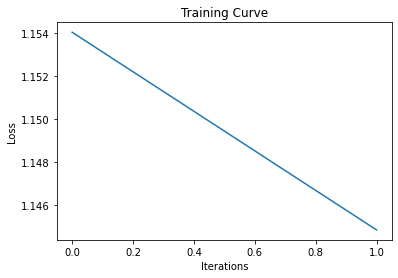

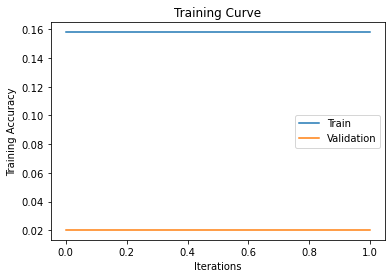

training time: 430.86121582984924


In [251]:
batch_size = 10

# try training

use_cuda = True
lr = 0.0001
epochs = 2

fcnn_model = FCNN()

if use_cuda and torch.cuda.is_available():
    print("using cuda!")
    fcnn_model.cuda()

import time

start = time.time()
train_acc = train(fcnn_model, learning_rate=lr, epochs=epochs, batch_size=batch_size, use_toy_data=True, val_loader=val_loader, train_loader=train_loader)
end = time.time()
print('training time:', end-start)

In [181]:
#Test
acc, loss = get_accuracy_and_loss(model=fcnn_model, criterion=nn.CrossEntropyLoss(), data_loader=test_loader)
print(acc, loss)

0.9586776859504132 0.8776396730771432


In [250]:
#import gc

#del fcnn_model #delete unnecessary variables 
#gc.collect()

9479

In [183]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plt_3d_scatter(x, y, z, xlabel, ylabel, zlabel):
    fig_3d = plt.figure(figsize=[15,6])
    ax = fig_3d.gca(projection='3d')
    ax.scatter(x,y,z, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.show()

In [184]:
output_channels_1 = 16
output_channels_2 = 32
output_channels_3 = 64
k = 5
input_size_fc1 = 8649
#input_size_fc1 = 5184000
input_size_fc1_1 = 518400
input_size_fc1_2 = 138384
input_size_fc1_3 = 2708480
input_size_fc1_4 = 5184000

#Fast Fourier Transform Convolutional Neural Network Architecture
class FCNN2(nn.Module):
    def __init__(self):
        super(FCNN2, self).__init__()
        self.fcov1 = FConv2d(1,1,250,20)
        self.fcov2 = FConv2d(1,1,100,10)
        self.fcov3 = FConv2d(1,1,50,2)
        self.conv1 = nn.Conv2d(1, output_channels_1, k)
        self.conv2 = nn.Conv2d(output_channels_1, output_channels_2, k)
        self.conv3 = nn.Conv2d(output_channels_2, output_channels_3, k)
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
#        self.fc1 = nn.Linear(input_size_fc1_1, output_channels_1)
        self.fc1 = nn.Linear(input_size_fc1_2, output_channels_1)
#        self.fc1 = nn.Linear(input_size_fc1_3, output_channels_1)
        self.fc2 = nn.Linear(output_channels_1, 3)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(self.fcov1(x))))
        x = self.pool(F.relu(self.fcov2(x)))
        x = self.pool(F.relu(self.fcov3(x)))
        x = x.view(-1, input_size_fc1_2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1)
        return x
    
    print('Fast Fourier Transform Convolutional Neural Network Architecture Selected')

Fast Fourier Transform Convolutional Neural Network Architecture Selected


In [185]:
output_channels_1 = 16
output_channels_2 = 32
output_channels_3 = 64
k = 5
input_size_fc1 = 8649
#input_size_fc1 = 5184000
input_size_fc1_1 = 518400
input_size_fc1_2 = 138384
input_size_fc1_3 = 2708480
input_size_fc1_4 = 5184000

#Fast Fourier Transform Convolutional Neural Network Architecture
class FCNN3(nn.Module):
    def __init__(self):
        super(FCNN3, self).__init__()
        self.fcov1 = FConv2d(2,1,250,20)
        self.fcov2 = FConv2d(2,1,100,10)
        self.fcov3 = FConv2d(2,1,50,2)
        self.conv1 = nn.Conv2d(1, output_channels_1, k)
        self.conv2 = nn.Conv2d(output_channels_1, output_channels_2, k)
        self.conv3 = nn.Conv2d(output_channels_2, output_channels_3, k)
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
#        self.fc1 = nn.Linear(input_size_fc1_1, output_channels_1)
        self.fc1 = nn.Linear(input_size_fc1_2, output_channels_1)
#        self.fc1 = nn.Linear(input_size_fc1_3, output_channels_1)
        self.fc2 = nn.Linear(output_channels_1, 3)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(self.fcov1(x))))
        x = self.pool(F.relu(self.fcov2(x)))
        x = self.pool(F.relu(self.fcov3(x)))
        x = x.view(-1, input_size_fc1_2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1)
        return x
    
    print('Fast Fourier Transform Convolutional Neural Network Architecture Selected')

Fast Fourier Transform Convolutional Neural Network Architecture Selected


torch.Size([1, 1, 750, 750])
torch.Size([1, 1, 750, 750])
training time: 1.7899296283721924


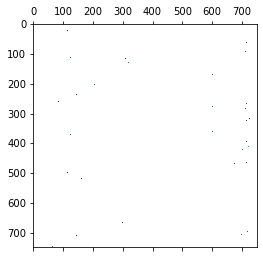

predicted: tensor([[-0.0382, -0.0006, -0.2281]], device='cuda:0',
       grad_fn=<SqueezeBackward1>)
actual: tensor([0.], device='cuda:0', dtype=torch.float64)


In [253]:
#sample prediction
sample_loader = torch.utils.data.DataLoader(data[601], shuffle=True, batch_size=1)

image, label = iter(sample_loader)
print(image.shape)
if use_cuda and torch.cuda.is_available():
    image = image.cuda()
    label = label.cuda()
print(image.shape)

start = time.time()
out = fcnn_model(image)
end = time.time()
print('training time:', end-start)

# plotting

plot_image = torch.squeeze(image).detach().cpu().numpy()
plot_image[plot_image == 0] = np.nan
plt.matshow(plot_image)
plt.show()

print('predicted:', out)
print('actual:', label)

In [ ]:
#demo prediction
demo_loader = torch.utils.data.DataLoader(data[601:], shuffle=True, batch_size=1)

image, label = iter(demo_loader).next()
# plotting
plot_image = torch.squeeze(image).detach().cpu().numpy()
plot_image[plot_image == 0] = np.nan
plt.matshow(plot_image)
plt.show()
plt.savefig('1.png')

model.cuda()
fcnn_model.cuda()

startc = time.time()
acc, loss = get_accuracy_and_loss(model=model, criterion=nn.CrossEntropyLoss(), data_loader=demo_loader)
endc = time.time()
timec = endc-startc
print('CNN:', acc, loss)
print('training time is %s seconds' % timec)

startf = time.time()
acc, loss = get_accuracy_and_loss(model=fcnn_model, criterion=nn.CrossEntropyLoss(), data_loader=demo_loader)
print('FCNN:', acc, loss)
endf = time.time()
timef = endf-startf
print('training time is %s seconds' % timef)


In [ ]:
plot_image = torch.squeeze(image).detach().cpu().numpy()
plt.matshow(plot_image)
plt.show()